## MIDTERM 
## FEB 14 2024

### IMPORTING REQUIRED PACKAGES

In [52]:
import pandas as pd
import numpy as np
import re 

### AUTHENTICATIION

In [53]:
# Importing praw package
# Using id and secret from reddit app


import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="sbHLFiorA3Gpufvb-MhHEw",
    client_secret="OLCBrNddm9LH5HCLfyKuEf6uPbtCtg",
    user_agent=user_agent
)

### DETAILS OF SUB REDDIT CHOOSEN

In [54]:
# Printing all the details of the sub reddit

submissions = set()
for submission in reddit.subreddit("love").hot(limit=None):
    print(submission.id)                                         
    print(submission.title)                                      
    print(submission.author)                                     # Author of the subreddit
    print(submission.created_utc)                                # Date and time being created
    print(submission.score)                                      # Average Score
    print(submission.upvote_ratio)                               # Upvote ratio
    print(submission.url)                                        
    break
    submissions.add(submission.title)
print(len(submissions))

1aquygd
I (34f) found out the love of my life (35m) has been in a relationship the entire time we were together
ThrowRAway670
1707937659.0
32
1.0
https://www.reddit.com/r/love/comments/1aquygd/i_34f_found_out_the_love_of_my_life_35m_has_been/
0


### COUNT FOR SUBMISSIONS

In [55]:
# Submissions and their count with len method

submissions = set()
for submission in reddit.subreddit("love").hot(limit=None):
    submissions.add(submission.title)
print(len(submissions))

221


### MINOR CHANGES FOR CONSISTENCY

In [56]:
# Create a database from submissions

df = pd.DataFrame(submissions)
df.head()

,0
0,Do you have to love someone to be a relationsh...
1,"Valentine’s Day ideas for presents (me, 32f, h..."
2,How do people find themselves falling in love ...
3,I flew to another Country to meet my girlfrien...
4,what do you think the real point of love is?


### CHANGING COLUMN NAME

In [57]:
# Change column names 

df.columns = ['Posts']
df.head()

,Posts
0,Do you have to love someone to be a relationsh...
1,"Valentine’s Day ideas for presents (me, 32f, h..."
2,How do people find themselves falling in love ...
3,I flew to another Country to meet my girlfrien...
4,what do you think the real point of love is?


### NEW COLUMN FOR LENGTH

In [58]:
# Create new column named length

df['Length'] = df['Posts'].str.len()

In [59]:
# head() method on the dataframe

df.head()

,Posts,Length
0,Do you have to love someone to be a relationsh...,59
1,"Valentine’s Day ideas for presents (me, 32f, h...",67
2,How do people find themselves falling in love ...,75
3,I flew to another Country to meet my girlfrien...,59
4,what do you think the real point of love is?,44


### CHECKING FOR DUPLICATE POSTS

In [60]:
# Checking for duplicate posts in subreddit

df.Posts.duplicated().sum() 

0

### REMOVING MENTIONS AND SYMBOLS

In [61]:
# Cleaning the text

# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)             # Remove @mentions replace with blank
    text = re.sub(r'#', '', text)                         # Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text)                   # Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text)            # Remove the hyperlinks
    text = re.sub(r':', '', text)                         
    
    return text

# Cleaning the text
df["Posts"]= df["Posts"].apply(cleanTxt)

# Show the clean text
df.head()

,Posts,Length
0,Do you have to love someone to be a relationsh...,59
1,"Valentine’s Day ideas for presents (me, 32f, h...",67
2,How do people find themselves falling in love ...,75
3,I flew to another Country to meet my girlfrien...,59
4,what do you think the real point of love is?,44


### REMOVING EMOJIS AND UNICODE

In [62]:
# Removing emoji & Unicode from the reddit data.

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"                 # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Cleaning the text
df["Posts"]= df["Posts"].apply(remove_emoji)

# Show the clean text
df.head()

,Posts,Length
0,Do you have to love someone to be a relationsh...,59
1,"Valentine’s Day ideas for presents (me, 32f, h...",67
2,How do people find themselves falling in love ...,75
3,I flew to another Country to meet my girlfrien...,59
4,what do you think the real point of love is?,44


### IMPORTING NATURAL LANGUAGE TOOLKIT 

In [64]:
# Importing nltk and downloading stopwords

import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Load the English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/sid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### REMOVING STOPWORDS

In [65]:
# Removing Stopwords

def remove_stopwords(text, stop_words):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Remove stop words from the 'posts' column
df['Posts'] = df['Posts'].apply(remove_stopwords, stop_words=stop_words)

# Display the DataFrame after stop word removal
print(df)

                                                 Posts  Length
0                      love someone relationship them?      59
1    Valentine’s Day ideas presents (me, 32f, 49m, ...      67
2        people find falling love finding attachments?      75
3        flew another Country meet girlfriend 8 months      59
4                            think real point love is?      44
..                                                 ...     ...
216  Apology Echoes Broken Promises, Tears, Weight ...      71
217       guys getting partner's valentine's day year?      71
218    love boyfriend much I’ve ever loved anyone life      71
219             It’s 3 years since rejected back life.      68
220  feel blessed, partner takes care needs instead...      85

[221 rows x 2 columns]


### TOKENIZATION OF TEXT

In [74]:
# Tokenization of the dataframe column

def tokenize_text(text):
    return nltk.word_tokenize(text)

# Tokenize the 'Posts' column
df['Tokens'] = df['Posts'].apply(tokenize_text)

# Display the DataFrame with tokenized posts
print(df)

                                                 Posts  Length  \
0                      LOVE SOMEONE RELATIONSHIP THEM?      59   
1    VALENTINE’S DAY IDEAS PRESENTS (ME, 32F, 49M, ...      67   
2        PEOPLE FIND FALLING LOVE FINDING ATTACHMENTS?      75   
3        FLEW ANOTHER COUNTRY MEET GIRLFRIEND 8 MONTHS      59   
4                            THINK REAL POINT LOVE IS?      44   
..                                                 ...     ...   
216  APOLOGY ECHOES BROKEN PROMISES, TEARS, WEIGHT ...      71   
217       GUYS GETTING PARTNER'S VALENTINE'S DAY YEAR?      71   
218    LOVE BOYFRIEND MUCH I’VE EVER LOVED ANYONE LIFE      71   
219             IT’S 3 YEARS SINCE REJECTED BACK LIFE.      68   
220  FEEL BLESSED, PARTNER TAKES CARE NEEDS INSTEAD...      85   

                                       Tokenized_Posts  \
0               [LOVE, SOMEONE, RELATIONSHIP, THEM, ?]   
1    [VALENTINE, ’, S, DAY, IDEAS, PRESENTS, (, ME,...   
2    [PEOPLE, FIND, FALLING, LOVE

### COLUMN FOR TOKEN COUNT

In [80]:
# Count for the tokens

df['token_count'] = df['Tokens'].map(len)
print(df)

                                                 Posts  Length  \
0                      LOVE SOMEONE RELATIONSHIP THEM?      59   
1    VALENTINE’S DAY IDEAS PRESENTS (ME, 32F, 49M, ...      67   
2        PEOPLE FIND FALLING LOVE FINDING ATTACHMENTS?      75   
3        FLEW ANOTHER COUNTRY MEET GIRLFRIEND 8 MONTHS      59   
4                            THINK REAL POINT LOVE IS?      44   
..                                                 ...     ...   
216  APOLOGY ECHOES BROKEN PROMISES, TEARS, WEIGHT ...      71   
217       GUYS GETTING PARTNER'S VALENTINE'S DAY YEAR?      71   
218    LOVE BOYFRIEND MUCH I’VE EVER LOVED ANYONE LIFE      71   
219             IT’S 3 YEARS SINCE REJECTED BACK LIFE.      68   
220  FEEL BLESSED, PARTNER TAKES CARE NEEDS INSTEAD...      85   

                                                Tokens  token_count  
0               [LOVE, SOMEONE, RELATIONSHIP, THEM, ?]            5  
1    [VALENTINE, ’, S, DAY, IDEAS, PRESENTS, (, ME,...           16

### IMPORTING COLLECTIONS FOR TOKEN COUNTERS

In [92]:
# Importing Collections and using counter

from collections import Counter


def cleantokens(tokens):
    cleaned_tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]    # Remove punctuation
    cleaned_tokens = [token for token in cleaned_tokens if len(token) > 1]  # Remove single characters
    cleaned_tokens = [token for token in cleaned_tokens if token.strip()]   # Remove blank spaces
    return cleaned_tokens

df['Tokens'] = df['Tokens'].apply(cleantokens)

counter = Counter()
df['Tokens'].map(counter.update)
print(counter.most_common(10))

[('LOVE', 109), ('LIKE', 24), ('BOYFRIEND', 21), ('IT', 19), ('DAY', 18), ('FEEL', 18), ('SOMEONE', 17), ('VALENTINE', 17), ('PARTNER', 17), ('MUCH', 16)]


### GRAPHS AND PLOTS

Text(0.5, 1.0, 'Line plot')

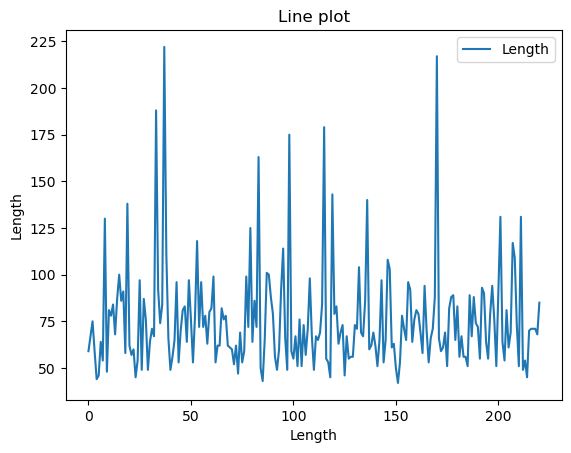

In [94]:
# Graph 1

import matplotlib.pyplot as plt

df['Length'].plot(kind='line',legend=True)
plt.xlabel('Length')
plt.ylabel('Length')
plt.title('Line plot')

### BOXPLOT

Text(0.5, 1.0, 'Boxplot for Length')

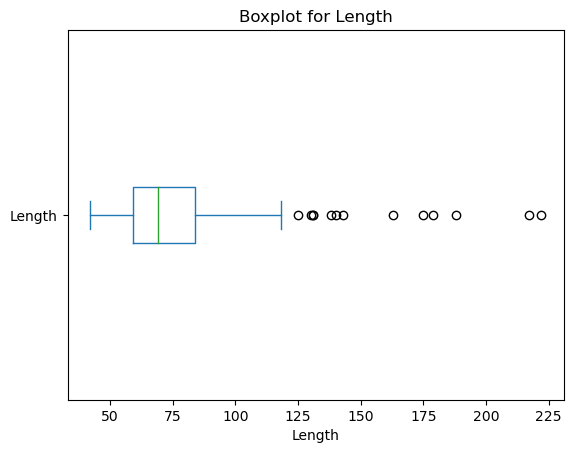

In [96]:
# Plot 2 - BOXPLOT FOR LENGTH

df['Length'].plot(kind = 'box', vert = False)
plt.xlabel('Length')
plt.title('Boxplot for Length')

### WORDCLOUDS

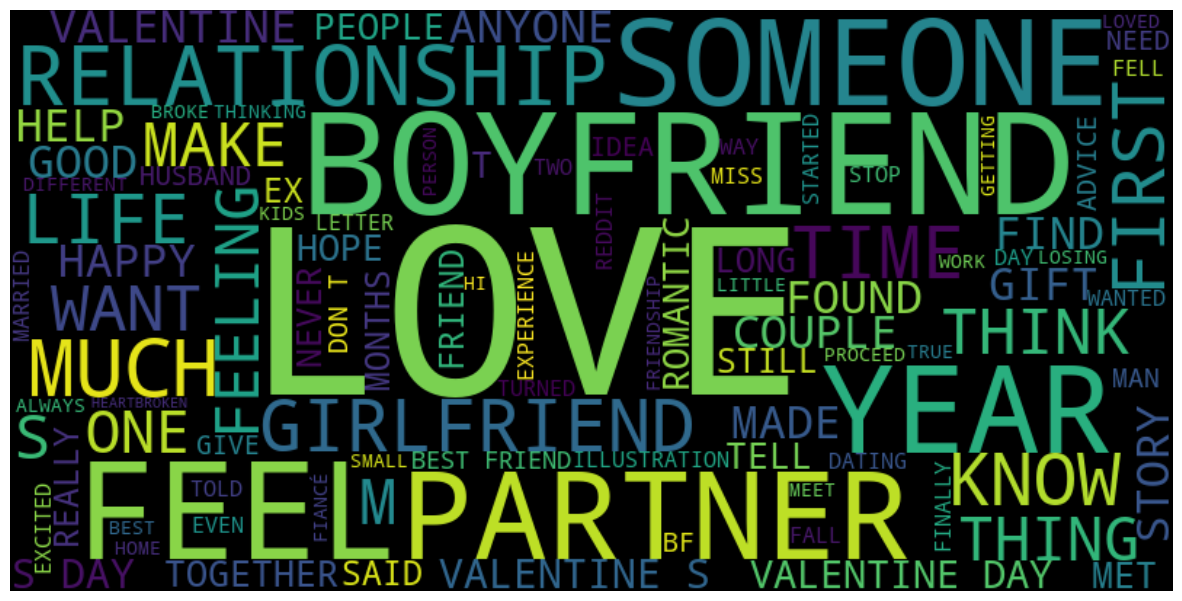

In [115]:
# Wordcloud 1

from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = ' '.join(df['Posts'])

# Generate word cloud

wordcloud = WordCloud(width=800, 
                      height=400, 
                      max_words=100,
                      background_color='black').generate(text)

plt.figure(figsize=(15, 25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### WORCLOUD 2

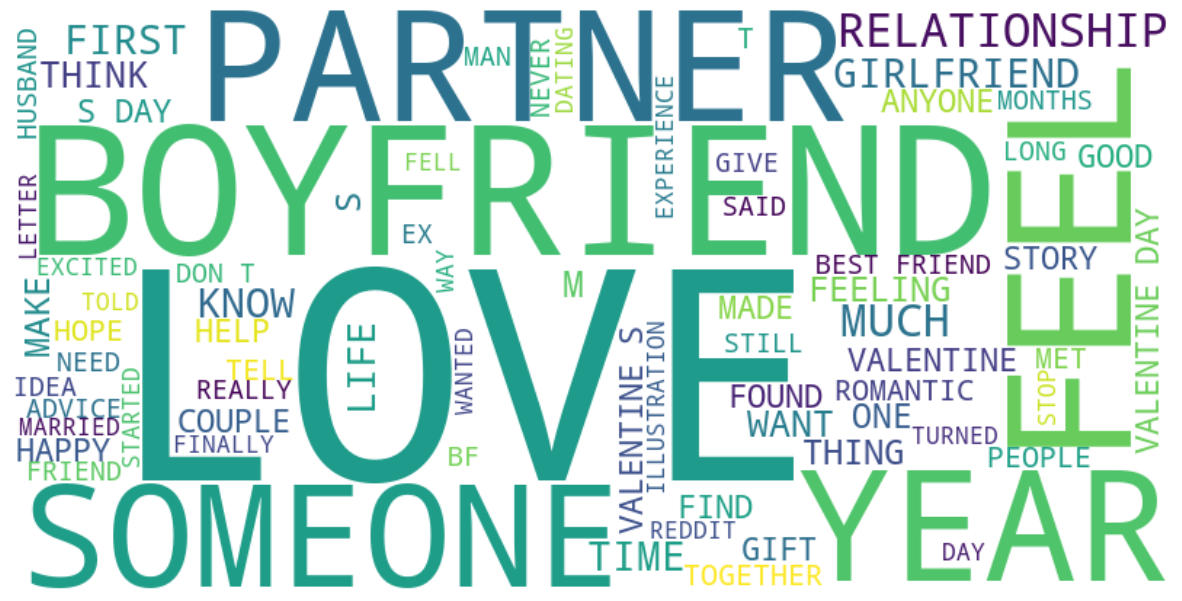

In [118]:
# Wordcloud 2

from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = ' '.join(df['Posts'])

# Generate word cloud

wordcloud = WordCloud(width=800, 
                      height=400, 
                      max_words=75,
                      background_color='white').generate(text)

plt.figure(figsize=(15, 25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### WORDCLOUD 3

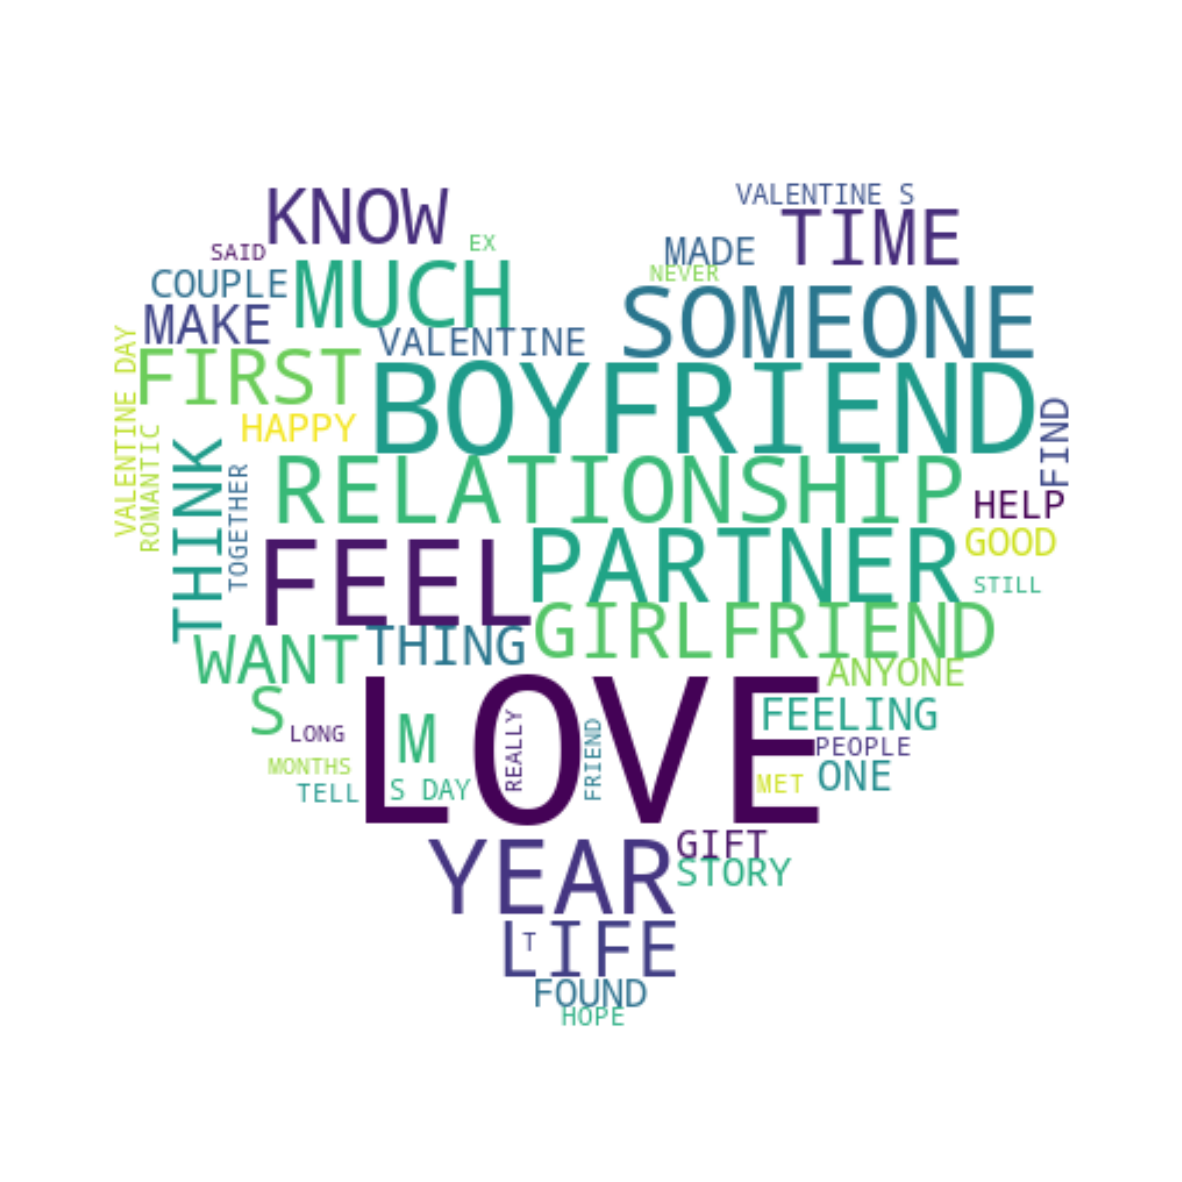

In [117]:
# Wordcloud 3

from wordcloud import WordCloud
from matplotlib import pyplot as plt
from PIL import Image

text = ' '.join(df['Posts'])

# Generate word cloud

mask = np.array(Image.open("heart.jpeg"))

wordcloud = WordCloud(width=800, 
                      height=400, 
                      max_words=50,
                      mask = mask,
                      background_color='white').generate(text)

plt.figure(figsize=(15, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### TEXTBLOB AND SENTIMENT ANALYSIS

In [128]:
# Importing modules

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### SUBJECTIVITY AND POLARITY

In [129]:
# Subjectivity and Polarity

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Posts'].apply(getSubjectivity)
df['Polarity'] = df['Posts'].apply(getPolarity)

# Now display data
df.head()

,Posts,Length,Tokens,token_count,Subjectivity,Polarity
0,LOVE SOMEONE RELATIONSHIP THEM?,59,"[LOVE, SOMEONE, RELATIONSHIP, THEM]",5,0.60,0.50
1,"VALENTINE’S DAY IDEAS PRESENTS (ME, 32F, 49M, ...",67,"[VALENTINE, DAY, IDEAS, PRESENTS, ME, 32F, 49M...",16,0.00,0.00
2,PEOPLE FIND FALLING LOVE FINDING ATTACHMENTS?,75,"[PEOPLE, FIND, FALLING, LOVE, FINDING, ATTACHM...",7,0.60,0.50
3,FLEW ANOTHER COUNTRY MEET GIRLFRIEND 8 MONTHS,59,"[FLEW, ANOTHER, COUNTRY, MEET, GIRLFRIEND, MON...",7,0.00,0.00
4,THINK REAL POINT LOVE IS?,44,"[THINK, REAL, POINT, LOVE, IS]",6,0.45,0.35


### CATEGORIZATION

In [130]:
# Group the range of Polarity to different categories

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,Posts,Length,Tokens,token_count,Subjectivity,Polarity,Insight
0,LOVE SOMEONE RELATIONSHIP THEM?,59,"[LOVE, SOMEONE, RELATIONSHIP, THEM]",5,0.600000,0.500000,Positive
1,"VALENTINE’S DAY IDEAS PRESENTS (ME, 32F, 49M, ...",67,"[VALENTINE, DAY, IDEAS, PRESENTS, ME, 32F, 49M...",16,0.000000,0.000000,Neutral
2,PEOPLE FIND FALLING LOVE FINDING ATTACHMENTS?,75,"[PEOPLE, FIND, FALLING, LOVE, FINDING, ATTACHM...",7,0.600000,0.500000,Positive
3,FLEW ANOTHER COUNTRY MEET GIRLFRIEND 8 MONTHS,59,"[FLEW, ANOTHER, COUNTRY, MEET, GIRLFRIEND, MON...",7,0.000000,0.000000,Neutral
4,THINK REAL POINT LOVE IS?,44,"[THINK, REAL, POINT, LOVE, IS]",6,0.450000,0.350000,Positive
5,THANKFUL LOVE BOYFRIEND,46,"[THANKFUL, LOVE, BOYFRIEND]",3,0.600000,0.500000,Positive
6,"LOVE UNSURE PROCEED, LONG DISTANCE RELATIONSHIP",64,"[LOVE, UNSURE, PROCEED, LONG, DISTANCE, RELATI...",7,0.500000,0.225000,Positive
7,I’M GOING TELL BOYFRIEND LOVE WEEKEND,54,"[GOING, TELL, BOYFRIEND, LOVE, WEEKEND]",8,0.600000,0.500000,Positive
8,"WELL, MET SOMEONE WHOLESOME ONE LEAST EXPECTED...",130,"[WELL, MET, SOMEONE, WHOLESOME, ONE, LEAST, EX...",20,0.500000,-0.070000,Negative
9,LOVE CAN'T TOGETHER,48,"[LOVE, CA, NT, TOGETHER]",4,0.600000,0.500000,Positive


### SENTIMENT SCORE VISUALIZATIONS

In [140]:
# IMPORTING packages for visualizing scores

import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### PIE CHART

Text(0, 0.5, '')

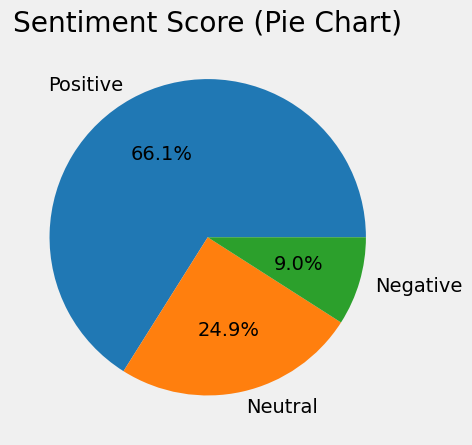

In [141]:
# Pie Chart

plt.rcParams["figure.figsize"] = (10, 8)
plt.subplot(1, 2, 1)
plt.title("Sentiment Score (Pie Chart)")

df["Insight"].value_counts().plot(kind="pie",
                                  autopct='%1.1f%%',
                                  colors=["#2078B4", "#FF7F0E", "#2CA02C"])
plt.ylabel("")

### HORIZONTAL BAR CHART

Text(0.5, 0, 'Scores')

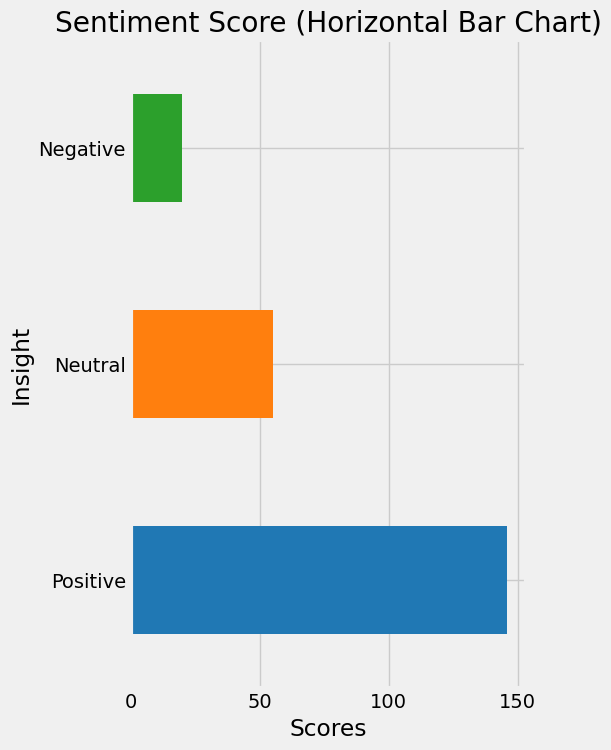

In [142]:
# Horizontal Bar Chart 

plt.subplot(1, 2, 2)
plt.title("Sentiment Score (Horizontal Bar Chart)")
df["Insight"].value_counts().plot(kind="barh", color=["#2078B4", "#FF7F0E", "#2CA02C"])
plt.xlabel("Scores")


### IMPORTING ERQUIRED PACKAGES FOR BINGLIU SCORING

In [143]:
# Importing ntlk package 

from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon                     # using opinion lexicon dataset from nltk.corpus
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',      # printing 10 positive opinion lexicons
      opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',      # printing 10 negative opinion lexicons
      opinion_lexicon.negative()[:10])


Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/sid/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


### DICTIONARY FOR SCORING

In [148]:
# Let's create a dictionary which we can use it for scoring our review text

nltk.download('punkt')
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary

for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary

for word in opinion_lexicon.negative():
        word_dict[word] = neg_score

[nltk_data] Downloading package punkt to /Users/sid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### BINGLIU FUNCTION

In [149]:
# bing_liu_score function 

def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score  

### APPLYING BINGLIU

In [150]:
# Applying it to dataframe

df['Bing_Liu_Score'] = df['Posts'].apply(bing_liu_score)

### DISPLAYING BINGLIU SCORE COLUMN

In [151]:
# Using head() on dataframe

df.head(10)

,Posts,Length,Tokens,token_count,Subjectivity,Polarity,Insight,Bing_Liu_Score
0,LOVE SOMEONE RELATIONSHIP THEM?,59,"[LOVE, SOMEONE, RELATIONSHIP, THEM]",5,0.60,0.500,Positive,1
1,"VALENTINE’S DAY IDEAS PRESENTS (ME, 32F, 49M, ...",67,"[VALENTINE, DAY, IDEAS, PRESENTS, ME, 32F, 49M...",16,0.00,0.000,Neutral,0
2,PEOPLE FIND FALLING LOVE FINDING ATTACHMENTS?,75,"[PEOPLE, FIND, FALLING, LOVE, FINDING, ATTACHM...",7,0.60,0.500,Positive,0
3,FLEW ANOTHER COUNTRY MEET GIRLFRIEND 8 MONTHS,59,"[FLEW, ANOTHER, COUNTRY, MEET, GIRLFRIEND, MON...",7,0.00,0.000,Neutral,0
4,THINK REAL POINT LOVE IS?,44,"[THINK, REAL, POINT, LOVE, IS]",6,0.45,0.350,Positive,1
5,THANKFUL LOVE BOYFRIEND,46,"[THANKFUL, LOVE, BOYFRIEND]",3,0.60,0.500,Positive,2
6,"LOVE UNSURE PROCEED, LONG DISTANCE RELATIONSHIP",64,"[LOVE, UNSURE, PROCEED, LONG, DISTANCE, RELATI...",7,0.50,0.225,Positive,0
7,I’M GOING TELL BOYFRIEND LOVE WEEKEND,54,"[GOING, TELL, BOYFRIEND, LOVE, WEEKEND]",8,0.60,0.500,Positive,1
8,"WELL, MET SOMEONE WHOLESOME ONE LEAST EXPECTED...",130,"[WELL, MET, SOMEONE, WHOLESOME, ONE, LEAST, EX...",20,0.50,-0.070,Negative,4
9,LOVE CAN'T TOGETHER,48,"[LOVE, CA, NT, TOGETHER]",4,0.60,0.500,Positive,1


### SCORES 

In [153]:
# SCORES

total_score = df['Bing_Liu_Score'].sum()

# Average
average_score = df['Bing_Liu_Score'].mean()

# Maximum
max_score = df['Bing_Liu_Score'].max()

# Minimum
min_score = df['Bing_Liu_Score'].min()

print("Total Score:", total_score)
print("Average Score:", average_score)
print("Maximum Score:", max_score)
print("Minimum Score:", min_score)

Total Score: 178
Average Score: 0.8054298642533937
Maximum Score: 4
Minimum Score: -2
